<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Building_an_AI_based_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [106]:
import matplotlib.pyplot as plt
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [107]:
df_super_store.sample(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6781,2077,CA-2017-140676,09/12/2017,15/09/2017,First Class,BF-11080,Bart Folk,Consumer,United States,Baltimore,...,21215,East,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,39.900,5,0.0,19.95
9872,6201,CA-2015-146675,16/04/2015,20/04/2015,Standard Class,SB-20185,Sarah Brown,Consumer,United States,Evanston,...,60201,Central,TEC-CO-10001766,Technology,Copiers,Canon PC940 Copier,1439.968,4,0.2,485.9892
9431,2988,CA-2016-139269,25/05/2016,30/05/2016,Standard Class,JB-16045,Julia Barnett,Home Office,United States,Columbus,...,31907,South,OFF-ST-10000689,Office Supplies,Storage,"Fellowes Strictly Business Drawer File, Letter...",1267.650,9,0.0,152.118
4101,3106,CA-2016-103037,25/07/2016,29/07/2016,Standard Class,KH-16630,Ken Heidel,Corporate,United States,Houston,...,77070,Central,OFF-LA-10004345,Office Supplies,Labels,Avery 493,15.712,4,0.2,5.6956
1567,5461,US-2014-107405,21/03/2014,25/03/2014,Standard Class,TS-21205,Thomas Seio,Corporate,United States,Asheville,...,28806,South,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,16.272,1,0.2,-3.8646


In [108]:
df_super_store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [109]:
# Discover Segment Values
df_super_store.groupby('Segment').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,,,,,,,,,
%,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Consumer,5189,5189,5188,5187,5187,5189,5188,5188,5187,5185,5187,5186,5189,5188,5186,5188,5188,5187,5187,5181
Corporate,3019,3019,3019,3019,3017,3019,3017,3019,3019,3019,3019,3019,3019,3019,3019,3018,3019,3016,3018,3018
Home Office,1782,1781,1781,1781,1782,1782,1782,1780,1782,1782,1782,1782,1782,1781,1781,1781,1782,1782,1782,1780



from the data I noticed that there is record with value not correct and it is only one record so I will remove it
the row as following

Segment = '%' looks like not correct values so I will remove it

In [110]:
df_super_store = df_super_store[df_super_store['Segment']!= '%']

In [111]:
df_super_store.groupby('Segment').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,,,,,,,,,
Consumer,5189,5189,5188,5187,5187,5189,5188,5188,5187,5185,5187,5186,5189,5188,5186,5188,5188,5187,5187,5181
Corporate,3019,3019,3019,3019,3017,3019,3017,3019,3019,3019,3019,3019,3019,3019,3019,3018,3019,3016,3018,3018
Home Office,1782,1781,1781,1781,1782,1782,1782,1780,1782,1782,1782,1782,1782,1781,1781,1781,1782,1782,1782,1780


**Summary**

The dataset appears to contain information related to orders, with various

1.   attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   the data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   from the first impression the significant feature is `'Ship Mode', 'Segment', 'Quantity', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics:

Let's try to explor the data

In [112]:
df_super_store.describe()
#df_super_store.describe(include='all')



,Row ID,Sales,Discount
count,9993.000000,9992.000000,9990.000000
mean,4997.831782,229.846798,0.156125
std,2885.117330,623.304898,0.206338
min,1.000000,0.444000,0.000000
25%,2500.000000,17.272000,0.000000
50%,4998.000000,54.432000,0.200000
75%,7496.000000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [113]:
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [114]:
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

### 2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.
I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected


In [115]:
df_super_store.dropna(inplace=True)

In [116]:
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [117]:
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [118]:
del df_super_store['Row ID']

5

In [119]:
df_super_store.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity          object
Discount         float64
Profit            object
dtype: object

##discover the values that expected to be number like Quantity, Sales, Profit

### Convert sales to float from object type as it look like numeric

### Convert Quantity to numberic

In [120]:
df_super_store['Quantity'].unique()


array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [121]:
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


### Convert Profit to numberic

create method to check the values of a column in dataframe that not numberic

In [122]:
def check_non_numeric_values(dataframe, column_name):
    non_numeric_values = dataframe.loc[~dataframe[column_name].astype(str).str.match(r'^-?[0-9.]+$', na=False), column_name]
    return non_numeric_values


In [123]:
df_super_store['Quantity'].unique()


array([ 5,  4,  8,  2,  6,  7,  3,  9, 12, 10,  1, 14, 13, 11])

In [124]:
df_super_store['Profit'].unique()


array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [125]:
print(check_non_numeric_values(df_super_store, 'Profit'))

5    "-2639.9912"
Name: Profit, dtype: object


In [126]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


### Check the data types after conversion

In [127]:
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


### check the NA values and clean it

In [128]:
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.3 Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.

In [129]:

# Select only numeric columns for scaling
numeric_cols = df_super_store.select_dtypes(include=['number']).columns
df_numeric = df_super_store[numeric_cols]

# Normalising and scaling using Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalising and scaling using  Z-score Standardization
scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

print(df_minmax)
print(df_standard)


         Sales  Quantity  Discount    Profit
0     0.257124  0.307692     0.875  0.000000
1     0.457129  0.230769     0.625  0.184000
2     0.124412  0.538462     1.000  0.193206
3     0.145692  0.307692     0.875  0.213334
4     0.107977  0.307692     1.000  0.244700
...        ...       ...       ...       ...
9933  0.539987  0.307692     0.000  0.748699
9934  0.565290  0.923077     0.000  0.769759
9935  0.599990  0.153846     0.000  0.776000
9936  0.799995  0.230769     0.000  0.888000
9937  1.000000  0.307692     0.000  1.000000

[9938 rows x 4 columns]
          Sales  Quantity  Discount     Profit
0      7.363546  0.545298  2.655951 -28.633984
1     13.393595  0.095723  1.681787 -16.714473
2      3.362342  1.894022  3.143034 -16.118073
3      4.003942  0.545298  2.655951 -14.814207
4      2.866854  0.545298  3.143034 -12.782286
...         ...       ...       ...        ...
9933  15.891710  0.545298 -0.753625  19.866783
9934  16.654582  4.141895 -0.753625  21.231032
9935  17.700

### 2.2 Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.

In [130]:
def clean_outliers_inplace(df, column_name):
    # Display the original number of rows
    original_rows = len(df)
    print(f"Number of rows before outlier removal: {original_rows}")

    # Create a boxplot to visualize the data
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot of the Original Dataset")
    plt.show()

    # Identify and treat outliers using the boxplot
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 10 * IQR
    upper_bound = Q3 + 10 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Remove outliers in the original DataFrame
    df.drop(outliers.index, inplace=True)

    # Reset the index of the original DataFrame
    df.reset_index(drop=True, inplace=True)

    # Display the number of rows after outlier removal
    cleaned_rows = len(df)
    print(f"Number of rows after outlier removal: {cleaned_rows}")

    # Calculate and display the percentage of removal
    percentage_removed = ((original_rows - cleaned_rows) / original_rows) * 100
    print(f"Percentage of removal: {percentage_removed:.2f}%")

    # Create a boxplot of the dataset after outlier treatment
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot After Outlier Treatment")
    plt.show()


Number of rows before outlier removal: 9938


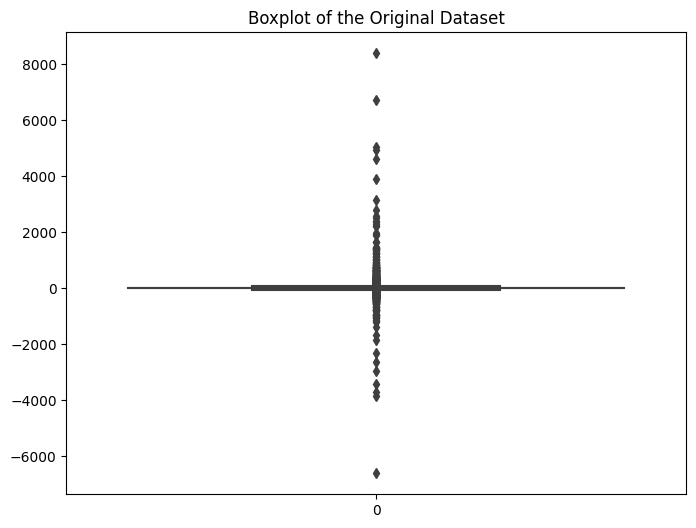

Number of rows after outlier removal: 9595
Percentage of removal: 3.45%


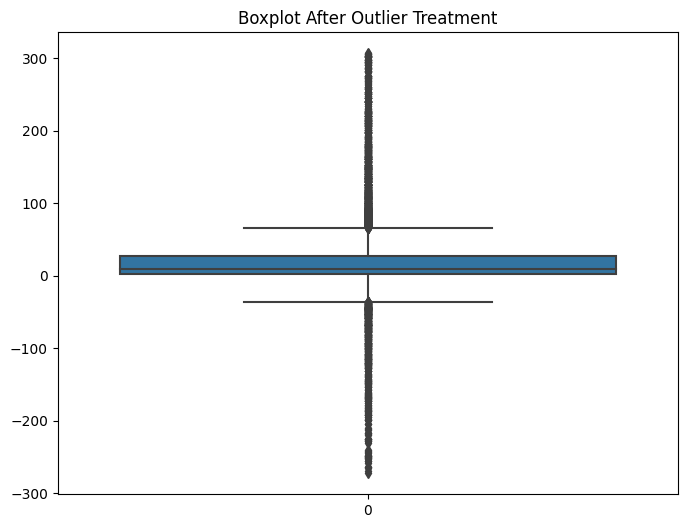

In [131]:
clean_outliers_inplace(df_super_store, 'Profit')

Number of rows before outlier removal: 9595


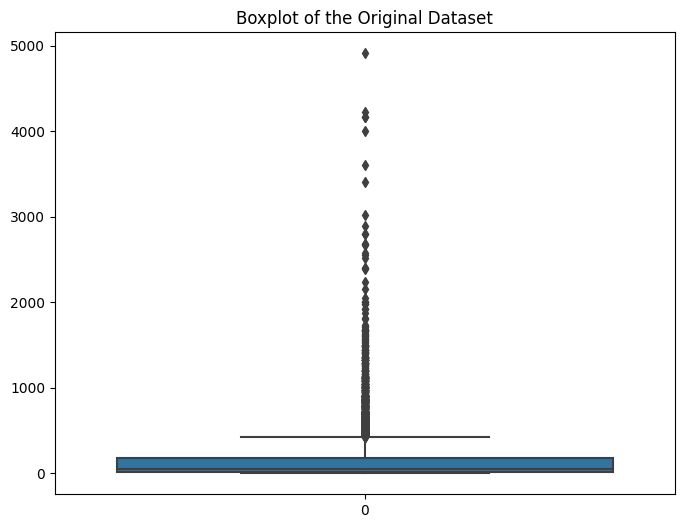

Number of rows after outlier removal: 9564
Percentage of removal: 0.32%


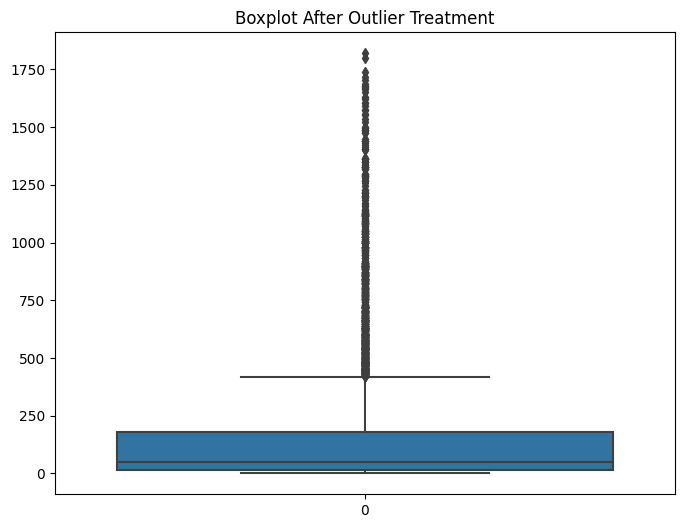

In [132]:
clean_outliers_inplace(df_super_store, 'Sales')


Number of rows before outlier removal: 9564


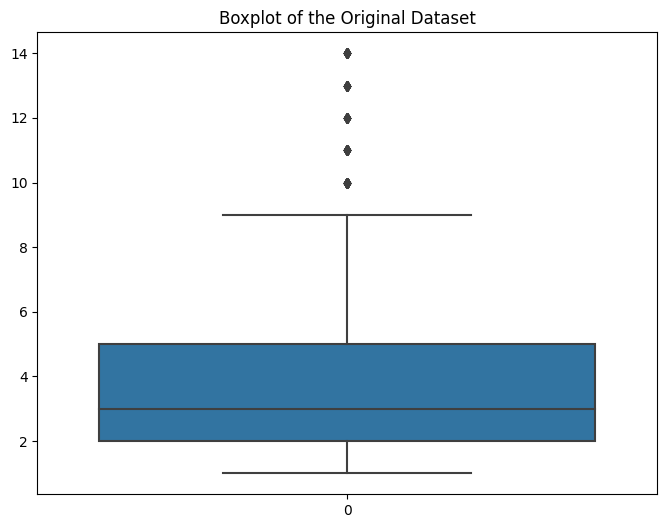

Number of rows after outlier removal: 9564
Percentage of removal: 0.00%


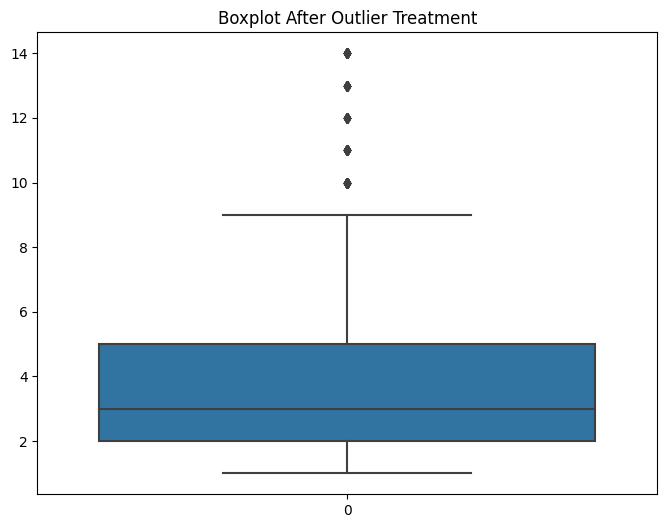

In [133]:
clean_outliers_inplace(df_super_store, 'Quantity')

Number of rows before outlier removal: 9564


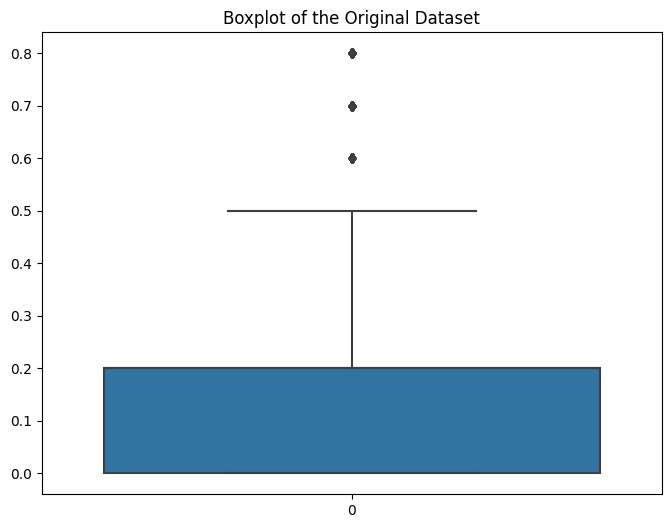

Number of rows after outlier removal: 9564
Percentage of removal: 0.00%


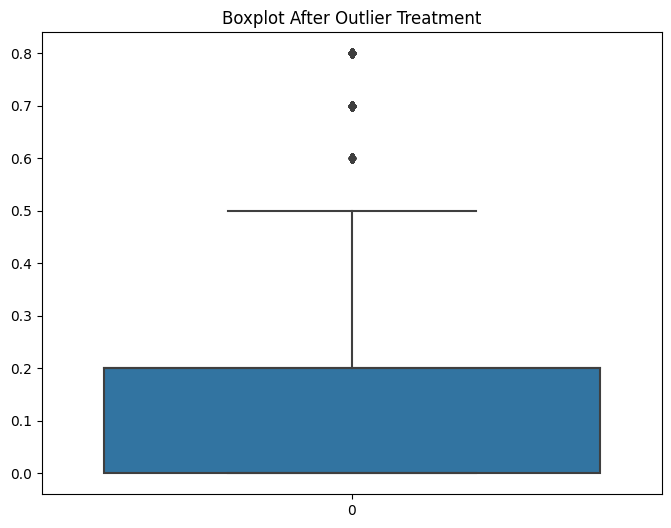

In [134]:
clean_outliers_inplace(df_super_store, 'Discount')

###2.6 Correlation: Describe features that are related and the nature of that relationship.

In [135]:
df_super_store.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
771,CA-2014-105417,01/07/2014,01/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.430,7,0.8,-18.2525
8394,CA-2014-146283,09/08/2014,15/09/2014,Standard Class,KT-16465,Kean Takahito,Consumer,United States,Houston,Texas,77036,Central,OFF-PA-10000482,Office Supplies,Paper,Snap-A-Way Black Print Carbonless Ruled Speed ...,182.112,6,0.2,61.4628
3918,CA-2015-111703,07/02/2015,07/09/2015,Standard Class,KB-16315,Karl Braun,Consumer,United States,Hollywood,Florida,33021,South,OFF-PA-10003349,Office Supplies,Paper,Xerox 1957,15.552,3,0.2,5.6376
5315,CA-2017-112333,04/08/2017,14/04/2017,Standard Class,KF-16285,Karen Ferguson,Home Office,United States,Plainfield,New Jersey,7060,East,OFF-AP-10001962,Office Supplies,Appliances,Black & Decker Filter for Double Action Dustbu...,41.950,5,0.0,10.4875
7870,CA-2015-123568,11/08/2015,14/11/2015,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,West Jordan,Utah,84084,West,OFF-PA-10001125,Office Supplies,Paper,Xerox 1988,92.940,3,0.0,41.8230


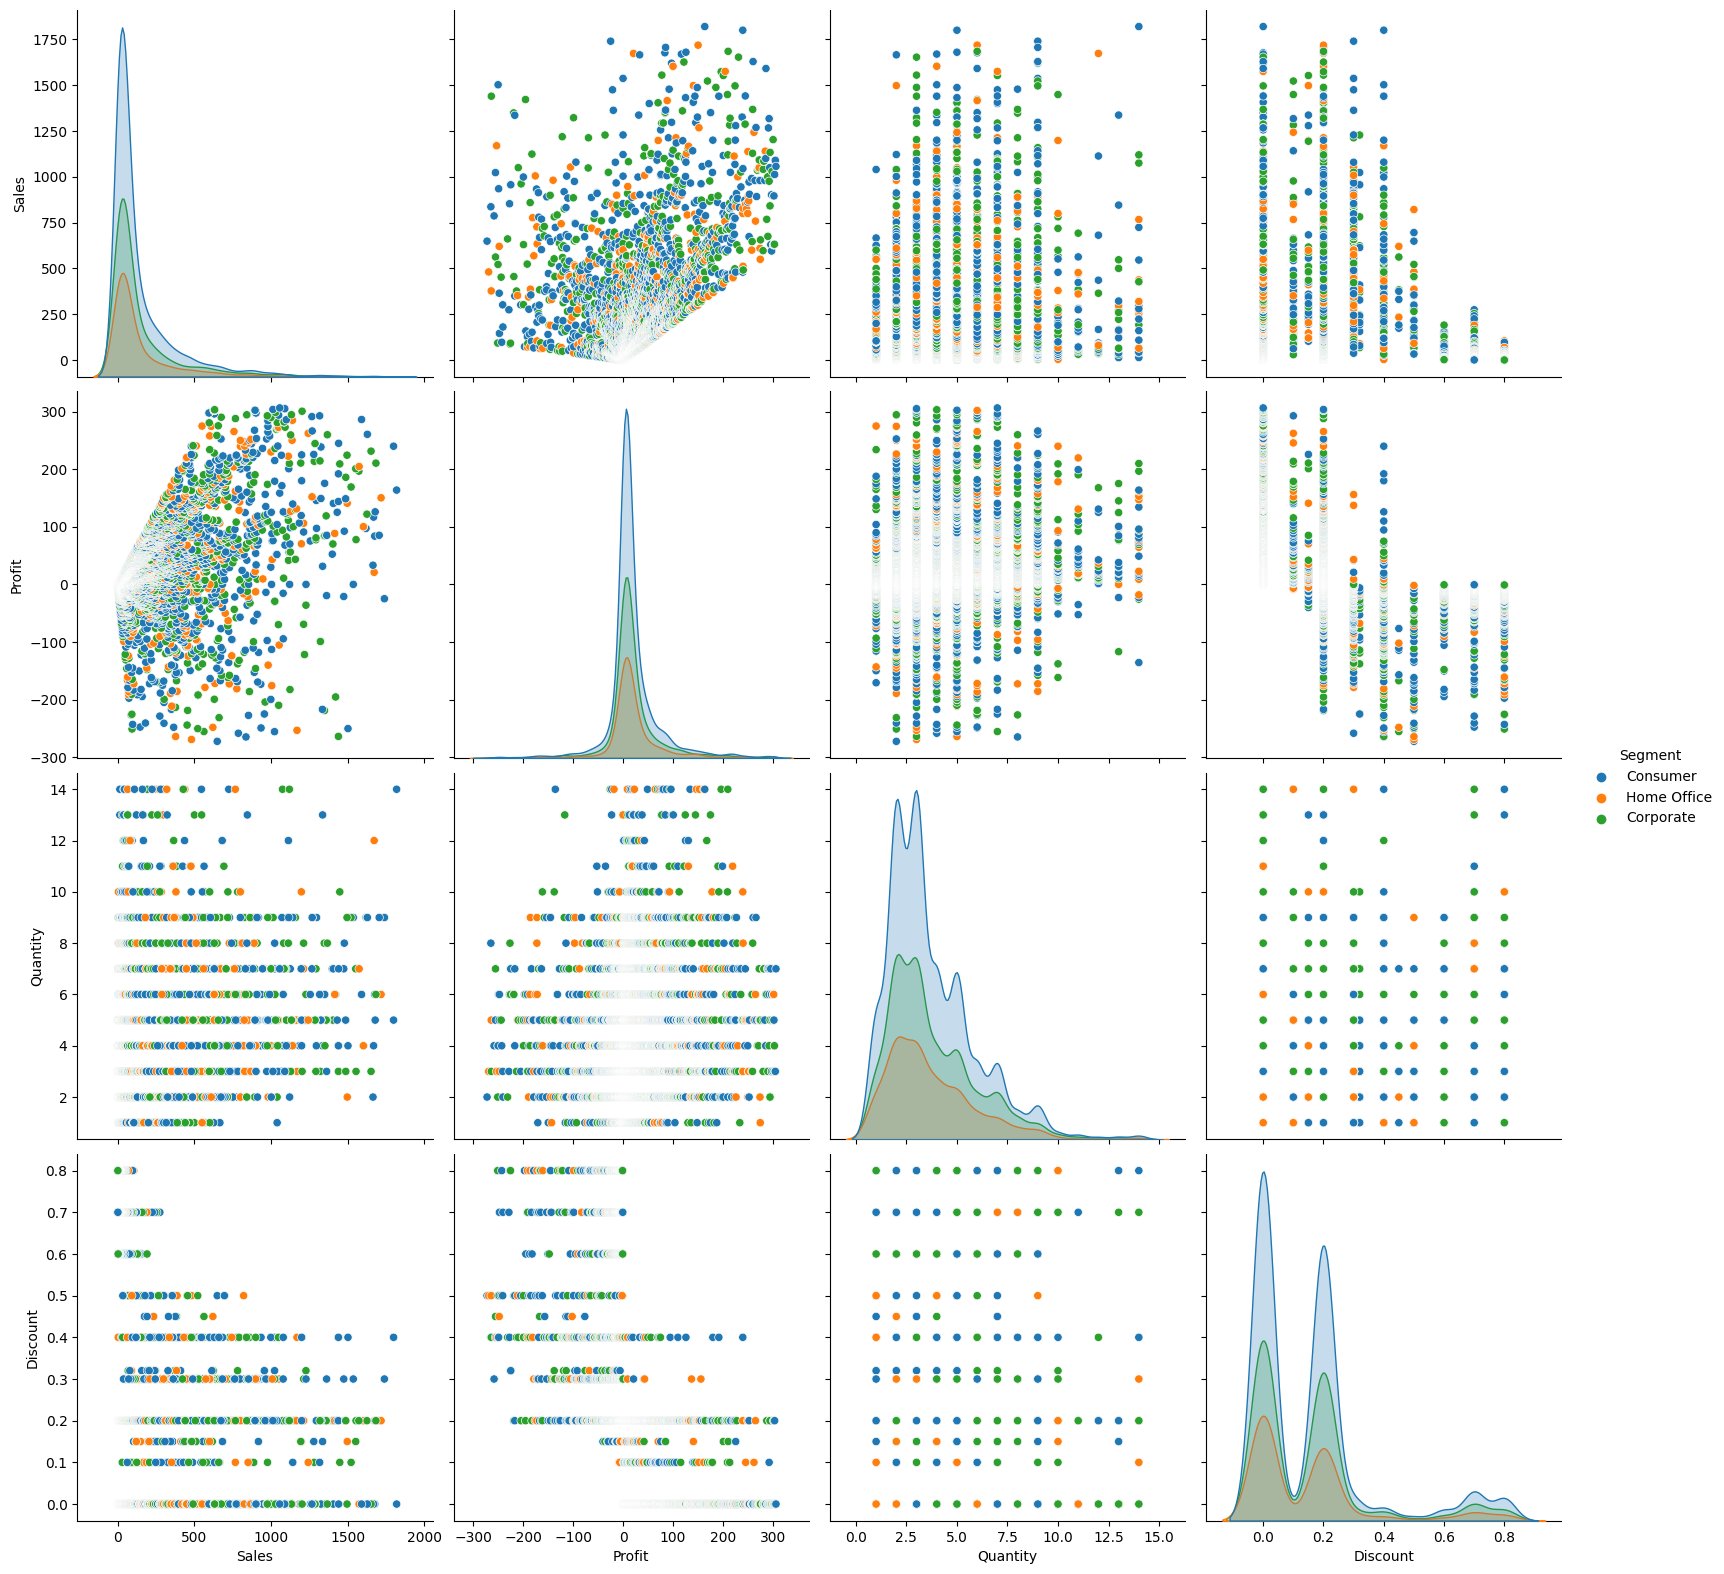

In [136]:
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit','Quantity' ,'Discount'])

In [137]:
correlation_matrix = df_super_store.corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.228268 -0.060798  0.434371
Quantity  0.228268  1.000000  0.005004  0.152204
Discount -0.060798  0.005004  1.000000 -0.391168
Profit    0.434371  0.152204 -0.391168  1.000000


<ipython-input-137-aa93160ee947>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

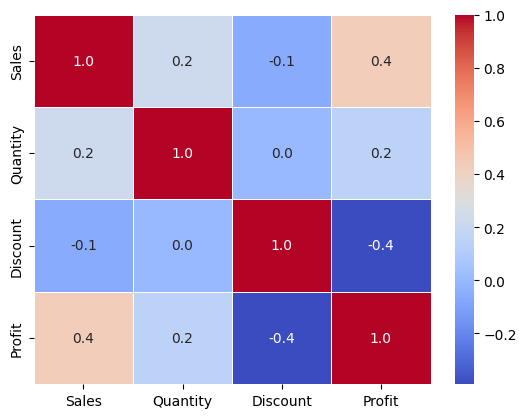

In [138]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)


*there is medium correlation between sales and profit 0.6*

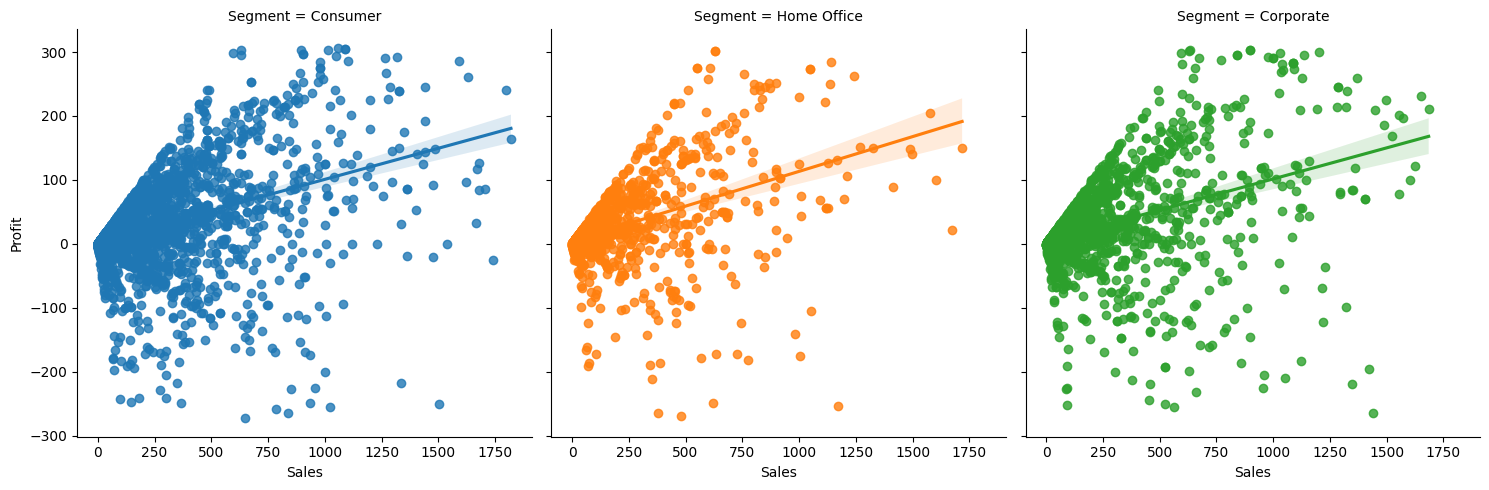

In [139]:
sns.lmplot(data=df_super_store, hue='Segment', x='Sales', y='Profit', col='Segment', fit_reg=True, col_wrap=3)
plt.show()

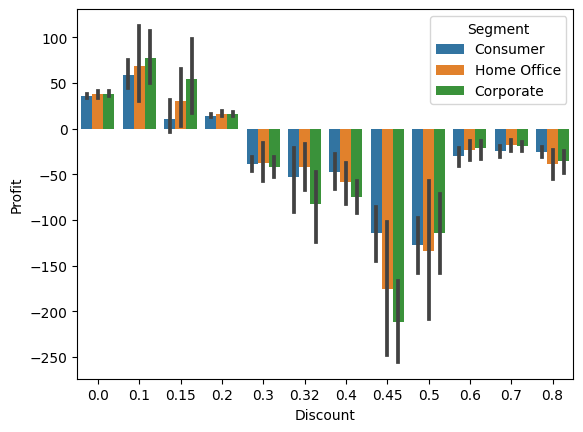

In [140]:
# check also the relation between the discount and profit
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Discount', y='Profit')
plt.show()

It look like there are some outliter let's study them by boxplot

array([[<Axes: title={'center': 'Discount'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Profit'}, xlabel='[Segment]'>],
       [<Axes: title={'center': 'Quantity'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Sales'}, xlabel='[Segment]'>]],
      dtype=object)

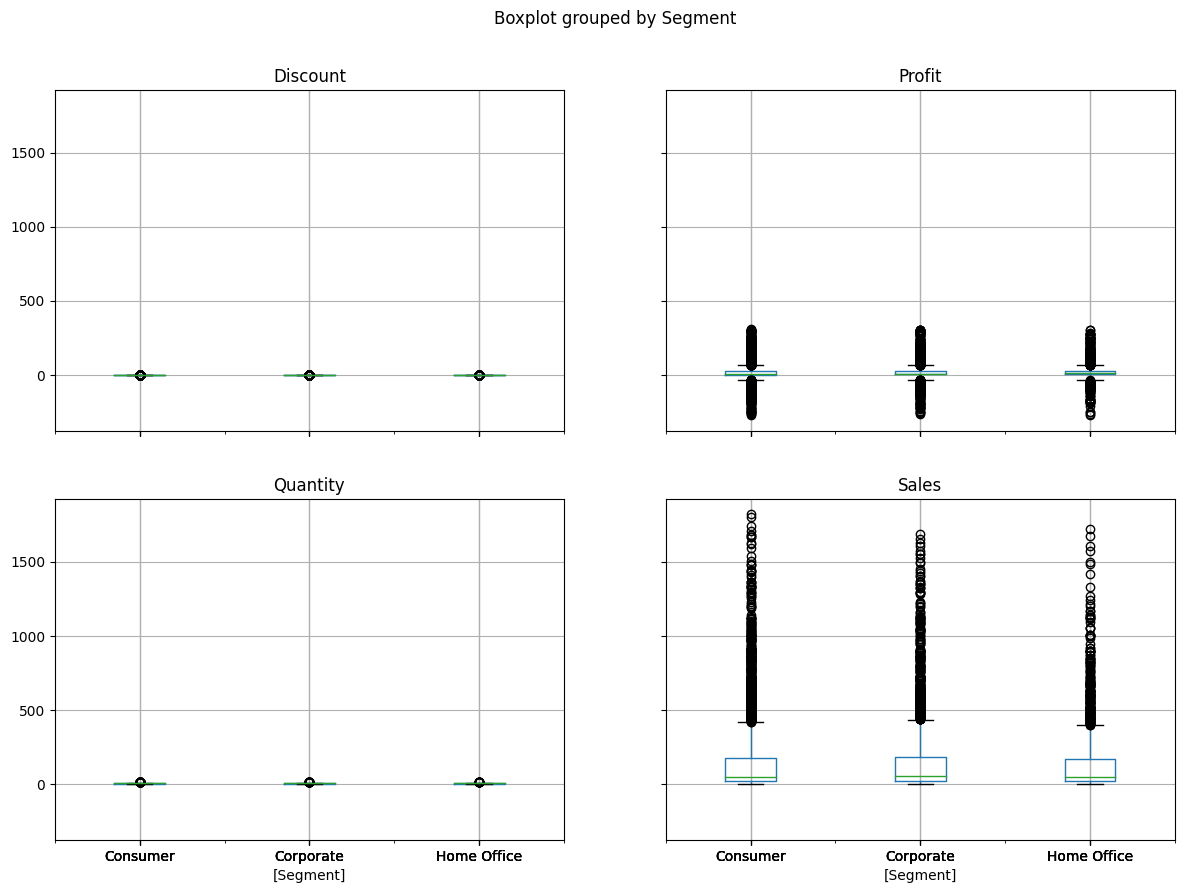

In [141]:
df_super_store.boxplot(by='Segment', figsize=(14,10))

### 2.4 Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.

#### 2.4.11   Group by Segment


In [142]:
# Group by Segment
#group by segement to understand the classes of the customer
#the important of the segment is to understand the customer classes

result = df_super_store.groupby('Segment')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)


             Sales  Profit  Quantity  Discount
Segment                                       
Consumer      4976    4976      4976      4976
Corporate     2886    2886      2886      2886
Home Office   1702    1702      1702      1702


2.   Group by Country


In [143]:
result = df_super_store.groupby('Country')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

               Sales  Profit  Quantity  Discount
Country                                         
US                 1       1         1         1
United States   9563    9563      9563      9563


no important in this group as all of them inside USA then try to group by city and also segment to understand the customer discrimination

In [144]:
result = df_super_store.groupby('City')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

             Sales  Profit  Quantity  Discount
City                                          
Aberdeen         1       1         1         1
Abilene          1       1         1         1
Akron           20      20        20        20
Albuquerque     14      14        14        14
Alexandria      15      15        15        15
...            ...     ...       ...       ...
Woonsocket       4       4         4         4
Yonkers         14      14        14        14
York             5       5         5         5
Yucaipa          1       1         1         1
Yuma             3       3         3         3

[531 rows x 4 columns]


In [145]:
result = df_super_store.groupby(['City', 'Segment'])[['Sales', 'Profit', 'Quantity','Discount']].count()

# Display the grouped result
print(result)

                      Sales  Profit  Quantity  Discount
City     Segment                                       
Aberdeen Consumer         1       1         1         1
Abilene  Consumer         1       1         1         1
Akron    Consumer        12      12        12        12
         Corporate        6       6         6         6
         Home Office      2       2         2         2
...                     ...     ...       ...       ...
Yonkers  Home Office      2       2         2         2
York     Corporate        5       5         5         5
Yucaipa  Corporate        1       1         1         1
Yuma     Corporate        2       2         2         2
         Home Office      1       1         1         1

[1016 rows x 4 columns]


In [146]:
!pip install plotly


In [147]:
import plotly.express as px

# Assuming df_super_store is your DataFrame and result is the grouped result
# Replace 'Sales', 'Profit', and 'Quantity' with the actual column names you are interested in
result = df_super_store.groupby(['City', 'Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['City', 'Segment'], values='Count', title='Count by City and Segment')
fig.show()

**This can lead having 5~10 big cities in terms of numbers like New Youk, LA, Philadelphia, San Francisco**

# Task 3:
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using all of the following:

#### the following method is used to create either **LogisticRegression** model or linear **LinearRegression**  and also print the accuracy of that model and return model to use it in prediction

In [148]:
def train_and_evaluate_model(X, y, use_logistic_regression=True):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (optional, but can be beneficial for some algorithms)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model based on the parameter
    if use_logistic_regression:
        model = LogisticRegression()
    else:
        model = LinearRegression()

    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    if use_logistic_regression:
        accuracy = accuracy_score(y_test, predictions)
        classification_report_result = classification_report(y_test, predictions)

        print(f'Logistic Regression - Accuracy: {accuracy}')
        print('Classification Report:')
        print(classification_report_result)
    else:
        # For linear regression, you might want to consider different evaluation metrics
        # depending on the nature of your problem (e.g., Mean Squared Error for regression).
        # Adjust as needed for your specific use case.
        print('Linear Regression - No classification metrics available for regression models.')
    return model

### 3.1 Two categorical variables

### 3.2 Numerical vs numerical
I want to find our date if there is relation between :
* profit (dependent)

And (independent):
* Quantity
* Sales

In [149]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Profit']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [150]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [151]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Profit']]

,Sales,Quantity,Discount,Profit
9562,1089.75,3,0.0,305.1300
9563,1056.86,7,0.0,306.4894


In [152]:
linreg.predict([[447.944 ,	7 ,	0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[46.57064754]])

### 3.3 Categorical vs numerical
I want to find our date if there is relation between :
* Sgement (dependent)

And (independent):
* Quantity
* Sales
* Discount




In [153]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Segment']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [154]:
# Train and evaluate logistic regression
model= train_and_evaluate_model(X, y, use_logistic_regression=True)


Logistic Regression - Accuracy: 0.5117616309461579
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.51      1.00      0.68       979
   Corporate       0.00      0.00      0.00       603
 Home Office       0.00      0.00      0.00       331

    accuracy                           0.51      1913
   macro avg       0.17      0.33      0.23      1913
weighted avg       0.26      0.51      0.35      1913



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [155]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Segment']]

,Sales,Quantity,Discount,Segment
9562,1089.75,3,0.0,Consumer
9563,1056.86,7,0.0,Consumer


In [156]:
model.predict([[1056.86 ,	3 ,	0]])

array(['Corporate'], dtype=object)